# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [6]:
# Dependencies and Setup
import csv 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests 
import time
from pprint import pprint
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

temp_units = "imperial"
# define url
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={temp_units}&q="

# define count of pass throughs
count_one = 0
set_one = 1

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
# set lists for the dataframe
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Processing Record 1 of Set 1 | chapais
Processing Record 2 of Set 1 | nelson bay
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | tsuyama
Processing Record 5 of Set 1 | taywarah
Processing Record 6 of Set 1 | derzhavinsk
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | esperance
Processing Record 9 of Set 1 | beringovskiy
Processing Record 10 of Set 1 | bara
City not found. Skipping...
Processing Record 11 of Set 1 | port elizabeth
Processing Record 12 of Set 1 | bandarbeyla
City not found. Skipping...
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | barstow
Processing Record 15 of Set 1 | tilichiki
Processing Record 16 of Set 1 | barrow
Processing Record 17 of Set 1 | avarua
City not found. Skipping...
City not found. Skipping...
Processing Record 18 of Set 1 | yatou
Processing Record 19 of Set 1 | georgetown
Processing Record 20 of Set 1 | shihezi
Processing Record 21 of Set 1 | east london
Processing Record 22 of Set 1 

Processing Record 34 of Set 4 | upernavik
Processing Record 35 of Set 4 | dumas
Processing Record 36 of Set 4 | douentza
Processing Record 37 of Set 4 | half moon bay
Processing Record 38 of Set 4 | dombarovskiy
Processing Record 39 of Set 4 | myanaung
Processing Record 40 of Set 4 | mitsamiouli
Processing Record 41 of Set 4 | hay river
Processing Record 42 of Set 4 | andilamena
City not found. Skipping...
Processing Record 43 of Set 4 | olinda
Processing Record 44 of Set 4 | peniche
Processing Record 45 of Set 4 | central point
Processing Record 46 of Set 4 | santo domingo
Processing Record 47 of Set 4 | berlevag
Processing Record 48 of Set 4 | kintampo
City not found. Skipping...
Processing Record 49 of Set 4 | along
Processing Record 1 of Set 5 | xichang
Processing Record 2 of Set 5 | tigil
Processing Record 3 of Set 5 | swan river
Processing Record 4 of Set 5 | capaci
Processing Record 5 of Set 5 | lander
Processing Record 6 of Set 5 | port blair
Processing Record 7 of Set 5 | home

Processing Record 21 of Set 8 | keflavik
Processing Record 22 of Set 8 | antigonish
Processing Record 23 of Set 8 | novoagansk
Processing Record 24 of Set 8 | sakaiminato
Processing Record 25 of Set 8 | flinders
Processing Record 26 of Set 8 | varhaug
Processing Record 27 of Set 8 | mount gambier
Processing Record 28 of Set 8 | akdepe
Processing Record 29 of Set 8 | hambantota
Processing Record 30 of Set 8 | gizo
Processing Record 31 of Set 8 | roma
City not found. Skipping...
Processing Record 32 of Set 8 | jerecuaro
Processing Record 33 of Set 8 | yar-sale
Processing Record 34 of Set 8 | lufilufi
Processing Record 35 of Set 8 | slonim
Processing Record 36 of Set 8 | tura
Processing Record 37 of Set 8 | chicama
Processing Record 38 of Set 8 | pangoa
Processing Record 39 of Set 8 | payakumbuh
Processing Record 40 of Set 8 | basco
Processing Record 41 of Set 8 | esmeraldas
Processing Record 42 of Set 8 | yevlax
City not found. Skipping...
Processing Record 43 of Set 8 | omboue
Processin

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# create a dictionary for establishing dataframe
weather_dict = {
    "City":city_two,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}



In [10]:
#Create dataframe
weather_df = pd.DataFrame(weather_dict)
#display head
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,chapais,90,CA,1569459446,87,49.78,-74.86,50.00,13.87
1,nelson bay,32,CA,1569459446,36,49.49,-117.29,57.19,3.42
2,hermanus,0,ZA,1569459446,68,-34.42,19.24,66.99,10.00
3,tsuyama,0,JP,1569459447,64,35.14,134.03,71.60,5.82
4,taywarah,0,AF,1569459447,22,33.35,64.42,53.82,6.38


In [11]:
# be sure there aren't any NaN values 
weather_df.count()


City          531
Cloudiness    531
Country       531
Date          531
Humidity      531
Lat           531
Lng           531
Max Temp      531
Wind Speed    531
dtype: int64

In [12]:
#export to csv 
weather_df.to_csv(output_data_file)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

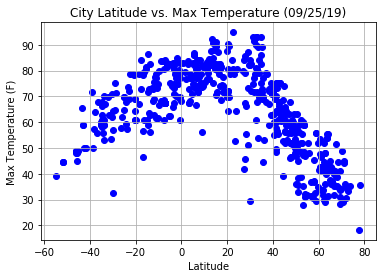

In [20]:
#Create Plot
plt.scatter(weather_df['Lat'], weather_df['Max Temp'],facecolors ='blue')
#Labels
plt.title("City Latitude vs. Max Temperature (09/25/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

#save plt as png
plt.savefig("Figures/fig_latvtemp.png")
#show plot
plt.show()

#### Latitude vs. Humidity Plot

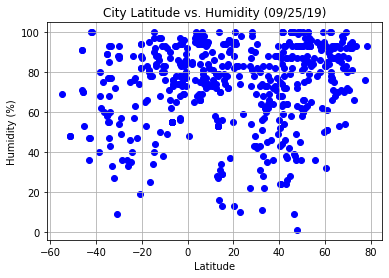

In [21]:
#Create Plot
plt.scatter(weather_df['Lat'], weather_df['Humidity'],facecolors ='blue')
#Labels
plt.title("City Latitude vs. Humidity (09/25/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

#save plt as png
plt.savefig("Figures/fig_latvhum.png")
#show plot
plt.show()

#### Latitude vs. Cloudiness Plot

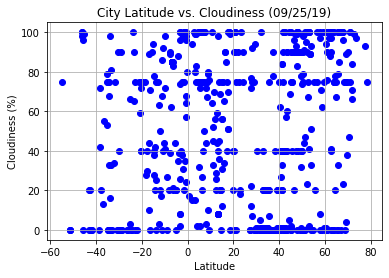

In [22]:
#Create Plot
plt.scatter(weather_df['Lat'], weather_df['Cloudiness'],facecolors ='blue')
#Labels
plt.title("City Latitude vs. Cloudiness (09/25/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

#save plt as png
plt.savefig("Figures/latvcloud.png")
#show plot
plt.show()

#### Latitude vs. Wind Speed Plot

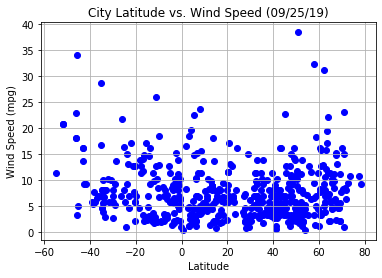

In [23]:
#Create Plot
plt.scatter(weather_df['Lat'], weather_df['Wind Speed'],facecolors ='blue')
#Labels
plt.title("City Latitude vs. Wind Speed (09/25/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mpg)")
plt.grid()

#save plt as png
plt.savefig("Figures/latvwind.png")
#show plot
plt.show()

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [26]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = weather_df[weather_df['Lat'] > 0]
northern_df.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,chapais,90,CA,1569459446,87,49.78,-74.86,50.00,13.87
1,nelson bay,32,CA,1569459446,36,49.49,-117.29,57.19,3.42
3,tsuyama,0,JP,1569459447,64,35.14,134.03,71.60,5.82
4,taywarah,0,AF,1569459447,22,33.35,64.42,53.82,6.38
5,derzhavinsk,0,KZ,1569459448,62,51.10,66.31,38.42,3.62


In [27]:
southern_df = weather_df[weather_df['Lat'] < 0]
southern_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
2,hermanus,0,ZA,1569459446,68,-34.42,19.24,66.99,10.00
7,esperance,98,AU,1569459449,77,-33.86,121.89,60.80,8.19
10,port elizabeth,85,CD,1569459450,55,-7.04,29.76,67.49,3.29
12,ushuaia,75,AR,1569459452,69,-54.81,-68.31,39.20,11.41
15,barrow,42,AR,1569459453,68,-38.31,-60.23,57.48,7.76


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.818449433320969


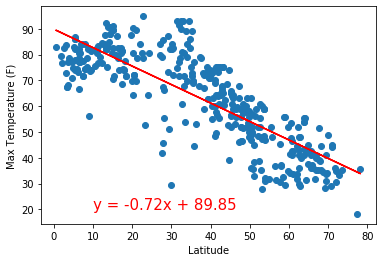

In [31]:
x_values = northern_df['Lat']
y_values = northern_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6956782741996984


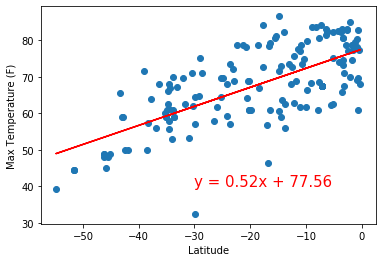

In [32]:
x_values = southern_df['Lat']
y_values = southern_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10784281653214327


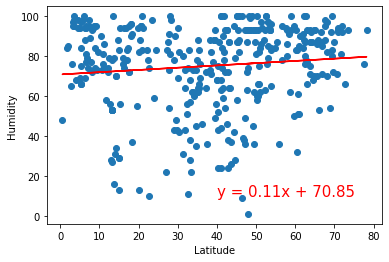

In [33]:
x_values = northern_df['Lat']
y_values = northern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2540547498005277


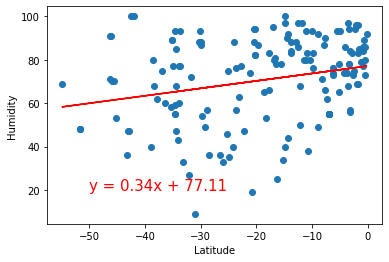

In [36]:
x_values = southern_df['Lat']
y_values = southern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50, 20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.08111264778972029


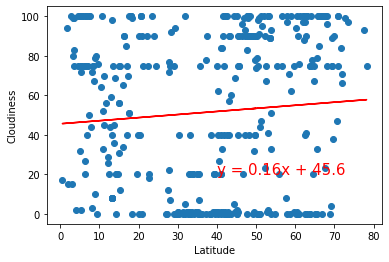

In [37]:
x_values = northern_df['Lat']
y_values = northern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.25747699802603047


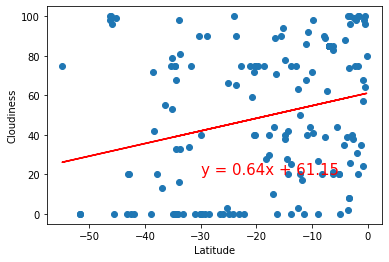

In [39]:
x_values = southern_df['Lat']
y_values = southern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.12936853797389145


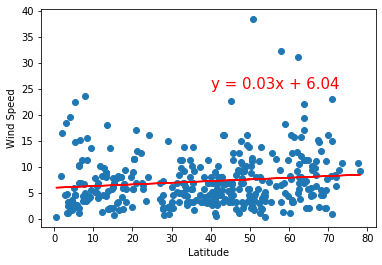

In [40]:
x_values = northern_df['Lat']
y_values = northern_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.3780404326122625


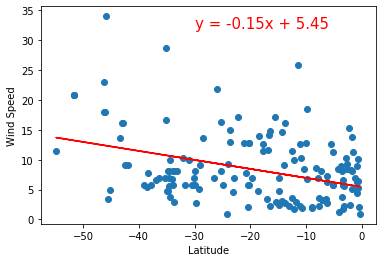

In [44]:
x_values = southern_df['Lat']
y_values = southern_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,32),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue}")
plt.show()